# Dolphins

## Lecture du jeu de donnée

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import pandas
import numpy
import seaborn as sns
%matplotlib inline


In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


Dans la lecture du jeu de donnes nous prenons connaissance des features:
nous avons 6 features et une target.
De plus nous remarquons que nous avons 2 types de donnees:
- des donnees categrorielles
-des donnees numeriques


On conclut qu'il faudra utiliser dans la partie preprocessing des encoders dans un pipeline.



## Etudes exploratoires des donnees (EDA)

Nous allons maintenant analyser plus en detail notre jeu de donnees

In [3]:
df.describe()

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


le .describe nous donne un petit resume des valeurs numeriques sous forme de moyenne, valeur max, valeur min... Cela est tres utile pour connaitre mieux le jeu de donnees mais surtout pour voir si il n'y a pas de valeur trop aberrante et aussi pour nous aider dans les features dans le choix de nos encoders.

In [4]:
df.nunique(axis=0)

variety             3
area                3
dimension_1_mm    164
dimension_2_mm     80
dimension_3_mm     55
mass_g             94
sex                 3
dtype: int64

### Etude de la target

Nous prenons connaissance de la target qui est la variete de l'animal 
 nous remarquons que la cible ne peut avoir que 3 choix possibles :

Tropicalis    152
Peale         124
Chinensis      68
Name: variety, dtype: int64


On peut obeserver le pourcentage du numbre de chaque variete:
Tropicalis    44.186047
Peale         36.046512
Chinensis     19.767442
Name: variety, dtype: float64

Notre jeu de donnees est plus ou moins equilibre, il n'y a pas de grandes differences entre chaque variete


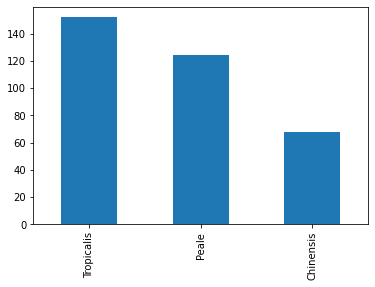

In [5]:
print("Nous prenons connaissance de la target qui est la variete de l'animal \n nous remarquons que la cible ne peut avoir que 3 choix possibles :")
print()
print(df['variety'].value_counts())
print()

df['variety'].value_counts().plot.bar()
print()

print('On peut obeserver le pourcentage du numbre de chaque variete:')
print(df['variety'].value_counts(normalize=True) * 100)
print()
print("Notre jeu de donnees est plus ou moins equilibre, il n'y a pas de grandes differences entre chaque variete")


### Etude des features

#### Proportion male/female

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

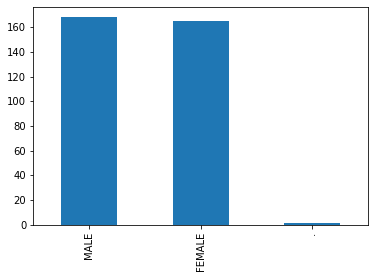

In [6]:
df['sex'].value_counts().plot.bar()
df['sex'].value_counts()

On remarque sur le plot ci-dessus un < . > nous allons donc le supprimer

In [7]:
df.drop(df.index[df['sex'] == '.'], inplace = True)

MALE      168
FEMALE    165
Name: sex, dtype: int64

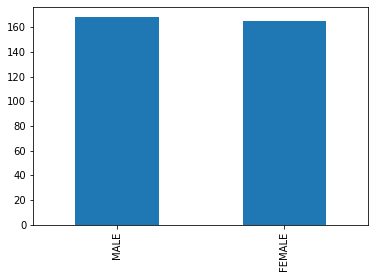

In [8]:
df['sex'].value_counts().plot.bar()
df['sex'].value_counts()

Nous remarquons qu'il y a presque autant de male que de female, notre jeu de donnees est donc bien equilibre sur cette feature

#### Etude de la masse des dauphins en fonction de leur sexe et de leur type:

In [9]:
df_mass = df.drop(columns=['area','dimension_1_mm','dimension_2_mm','dimension_3_mm'])
df_mass.head()

,variety,mass_g,sex
0,Tropicalis,3750.0,MALE
1,Tropicalis,3800.0,FEMALE
2,Tropicalis,3250.0,FEMALE
3,Tropicalis,NaN,NaN
4,Tropicalis,3450.0,FEMALE


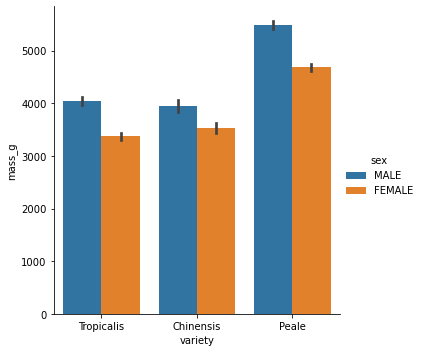

In [10]:
sns.catplot(y="mass_g", x="variety", hue="sex",

               data=df_mass, kind="bar");

Nous remarquons que les males ont une masse plus eleve que les femeles mais nous remarquons aussi que l'espece de dauphins Peale est en general plus grosse.
Pour la suite nous savons deja que le sex et la mass vont jouer un role important dans notre prediction.

#### Etude des zones

Caraibean    167
Pacific      124
Artic         52
Name: area, dtype: int64
Caraibean    48.688047
Pacific      36.151603
Artic        15.160350
Name: area, dtype: float64


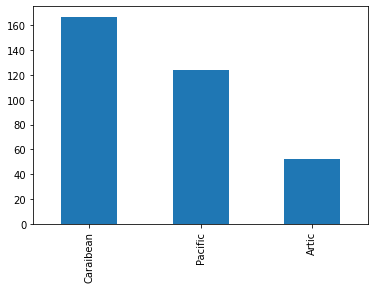

In [11]:
df['area'].value_counts().plot.bar()
print(df['area'].value_counts())
print(df['area'].value_counts(normalize=True) * 100)

On remarque qu'il y a seulement 3 zones et que les dauphins se trouvent plus dans les Caraibes 

## Preprocessing et cleaning des donnees

### Nettoyage des donnees

Nous commencons par compter les valeurs nan dans chaque colonne:

In [12]:
df.head(1)

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE


In [13]:
print('Notre jeu de donnees a',len(df['variety']),'lignes')

Notre jeu de donnees a 343 lignes


In [14]:
df.isna().sum()

variety            0
area               0
dimension_1_mm     2
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64

Nous observons qu'il y a tres peu de valeurs manquantes donc nous allons les supprimer 

In [15]:
dfn = df.dropna(axis=0) 
print(dfn.isna().sum())

variety           0
area              0
dimension_1_mm    0
dimension_2_mm    0
dimension_3_mm    0
mass_g            0
sex               0
dtype: int64


In [16]:
print('Notre nouveau jeu de donnees a',len(dfn['variety']),'lignes')

Notre nouveau jeu de donnees a 333 lignes


Nous allons Lower le text pour la derniere partie du TP

In [17]:
dfn['area'] = dfn['area'].str.lower()
dfn['sex'] = dfn['sex'].str.lower()

<ipython-input-17-ac546e64bb04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['area'] = dfn['area'].str.lower()
<ipython-input-17-ac546e64bb04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['sex'] = dfn['sex'].str.lower()


Nous avons perdu seulement 10 lignes dans ce nettoyage donc cela n'est pas tres important pour la suite, notre DF est maintenant pret pour la partie encodage.

### Encodage du jeu de donnees


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#### Typage des donnees

In [19]:
dfn.head(1)

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,artic,39.1,18.7,181.0,3750.0,male


Maintenant nous allons pouvoir encoder notre jeu de donnees:

Les donnees categorielles:
- Area
- Sex
- La target: variety

Les donnees numeriques:

- Dimension 1, 2 et 3
- La masse

#### selection de la target et des features et creation du pipiline

In [20]:
print('La target: y')
y= dfn['variety']

La target: y


In [21]:
print('Les features: X')
X = dfn.drop(['variety'], axis = 1 )

Les features: X


In [22]:
categorical_features = ['sex','area']


categorical_transformer = Pipeline(steps=[    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#encodage des valeurs numeriques
numeric_features = ['dimension_1_mm','dimension_2_mm','dimension_3_mm','mass_g']

numeric_transformer = Pipeline(steps=[('MinMax' , MinMaxScaler())])

#ensemblage des features:

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        
        ])


Pour la creation du pipeline j'ai decide d'utiliser un one hot encoders pour  valeurs categorielle et un MinMaxScaler encoder car j'ai remarque au tout debut de l'etude qu'il y avait une grande disparite entre les features numeriques

### Analyse des modeles

#### Random forest

In [23]:
clf_rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("Classifier",  RandomForestClassifier())]
)
#splitting du model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#entrainement du model

clf_rf.fit(X_train, y_train)
print("model score: %.3f" % clf_rf.score(X_test, y_test))

model score: 0.985


In [24]:
predictionRF = clf_rf.predict(X_train)
predictionRF_test = clf_rf.predict(X_test)
print()
print(confusion_matrix(y_test, predictionRF_test))
print()
print("On remarque que le modele est plutot tres performant est ne se trompe qu'une seule fois")


[[ 9  0  1]
 [ 0 18  0]
 [ 0  0 39]]

On remarque que le modele est plutot tres performant est ne se trompe qu'une seule fois


 A mon sens il est inutil d'utiliser un Gridsearch car le modele est deja tres performant
 de plus il est aussi inutil de faire un cross validation car les donnees sont plutot bien reparties

#### Modele KNN

Nous allons essayer un nouveau modele

In [25]:
clf_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("Classifier",  KNeighborsClassifier())]
)
#splitting du model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#entrainement du model

clf_knn.fit(X_train, y_train)
print("model score: %.3f" % clf_knn.score(X_test, y_test))

model score: 1.000


In [48]:
predictionKNN = clf_knn.predict(X_train)
predictionKNN_test = clf_knn.predict(X_test)
print()
print(confusion_matrix(y_test, predictionKNN_test))
print()
print("On remarque que le modele est plutot tres performant est ne se trompe jamais, il est parfait !!!")
print('Je choisis donc ce modele')


[[16  0  0]
 [ 0 22  0]
 [ 0  0 29]]

On remarque que le modele est plutot tres performant est ne se trompe jamais, il est parfait !!!
Je choisis donc ce modele


### Interface graphique

Dans cette partie nous allons creer une petite interface pour predire une espece de dauphin:

In [27]:
X.head(1)

,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,artic,39.1,18.7,181.0,3750.0,male


In [44]:
print('rentrez les donnes du dauphin')

rentrez les donnes du dauphin


In [29]:
area = input('le lieux:')

le lieux:artic


In [31]:
dimension_1_mm = input('dimension_1: ')

dimension_140


In [32]:
dimension_2_mm = input('dimension_2: ')

dimension_2: 20


In [33]:
dimension_3_mm = input('dimension_3: ')

dimension_3: 25


In [34]:
mass_g = input('la masse:')

la masse:4000


In [36]:
sex = input('le sex: ')

le sex: male


In [39]:
get_data = []
get_data.append({'area': area , "dimension_1_mm": dimension_1_mm, "dimension_2_mm": dimension_2_mm,'dimension_3_mm':dimension_3_mm,'mass_g':mass_g,'sex': sex})        


In [40]:
df_p = pd.DataFrame(get_data)

In [41]:
df_p

,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,artic,40,20,25,4000,male


In [46]:
prediction = clf_knn.predict(df_p)
print("L'espece de dauphin est",prediction[0])

L'espece de dauphin est Tropicalis
